# Google Big Query Test
### Summary
This document serves to test Google Big Query feasibility for uploading files in order to avoid changin file paths.

### Upload Packages


In [122]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt



In [73]:


# Public URL after making the file public in the format 'https://storage.googleapis.com/...'
file_url = 'https://storage.googleapis.com/home_credit_files/application_train.csv'

# Use pandas to read the CSV directly from the URL
df = pd.read_csv(file_url)

# Now, you can work with the DataFrame
print(df.head())



C:\Users\gbrown\AppData\Local\Temp\ipykernel_48760\67639752.py:5: DtypeWarning: Columns (90) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_url)


   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
0      278284       0         Cash loans           F         False   
1      278285       0         Cash loans           F         False   
2      278289       0    Revolving loans           M         False   
3      278290       0         Cash loans           F         False   
4      278292       0         Cash loans           M          True   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0             True             0           90000.0    360000.0      13059.0   
1             True             0          135000.0    728460.0      57685.5   
2             True             0          225000.0    180000.0       9000.0   
3            False             1           72000.0    675000.0      21775.5   
4            False             0          157500.0    545040.0      25407.0   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0 

In [74]:
print(df.shape)

(307511, 122)


In [75]:

df.dtypes.value_counts()


float64    65
int64      41
object     14
bool        2
Name: count, dtype: int64

In [76]:
df['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

In [77]:
df['TARGET'].value_counts(normalize = True) * 100

TARGET
0    91.927118
1     8.072882
Name: proportion, dtype: float64

In [78]:
# Train data set

# calculate total number of missing values for each column
missing_values_train = df.isnull().sum()

# calculate total number of rows
total_rows_train = df.shape[0]

# calculate percentage of missing values for each column
pct_missing_train = (missing_values_train / total_rows_train) * 100

# sort output
pct_missing_sorted_train = pct_missing_train.sort_values(ascending=False)

# print result
print(pct_missing_sorted_train.head(25))

COMMONAREA_MEDI             69.872297
COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_AVG     69.432963
NONLIVINGAPARTMENTS_MEDI    69.432963
FONDKAPREMONT_MODE          68.386172
LIVINGAPARTMENTS_MODE       68.354953
LIVINGAPARTMENTS_AVG        68.354953
LIVINGAPARTMENTS_MEDI       68.354953
FLOORSMIN_AVG               67.848630
FLOORSMIN_MODE              67.848630
FLOORSMIN_MEDI              67.848630
YEARS_BUILD_MEDI            66.497784
YEARS_BUILD_MODE            66.497784
YEARS_BUILD_AVG             66.497784
OWN_CAR_AGE                 65.990810
LANDAREA_MEDI               59.376738
LANDAREA_MODE               59.376738
LANDAREA_AVG                59.376738
BASEMENTAREA_MEDI           58.515956
BASEMENTAREA_AVG            58.515956
BASEMENTAREA_MODE           58.515956
EXT_SOURCE_1                56.381073
NONLIVINGAREA_MODE          55.179164
dtype: float64


In [79]:

missings = pct_missing_sorted_train.to_frame(name='MissingPercentage')
print(missings)

                          MissingPercentage
COMMONAREA_MEDI                   69.872297
COMMONAREA_AVG                    69.872297
COMMONAREA_MODE                   69.872297
NONLIVINGAPARTMENTS_MODE          69.432963
NONLIVINGAPARTMENTS_AVG           69.432963
...                                     ...
NAME_HOUSING_TYPE                  0.000000
NAME_FAMILY_STATUS                 0.000000
NAME_EDUCATION_TYPE                0.000000
NAME_INCOME_TYPE                   0.000000
SK_ID_CURR                         0.000000

[122 rows x 1 columns]


In [80]:
filter_missings = missings[(missings['MissingPercentage'] < 10)]
filter_missings.shape

(65, 1)

In [81]:
columns = list(filter_missings.index)
column_list = [item for item in columns if 'FLAG' not in item]
#column_list_2 = [item for item in column_list if 'TARGET' not in item]
column_list_3 = [item for item in column_list if 'SK_ID_CURR' not in item]


In [82]:
list1 = column_list_3
list2 = ['NAME_TYPE_SUITE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']

# Initialize an empty list to store items from list1 that are not in list2
items_not_in_list2 = []

# Iterate through each item in list1
for item in list1:
    # Check if the item is not in list2
    if item not in list2:
        # Add the item to the items_not_in_list2 list
        items_not_in_list2.append(item)

# Print the items that are not in list2
items_not_in_list2

['EXT_SOURCE_2',
 'AMT_GOODS_PRICE',
 'AMT_ANNUITY',
 'CNT_FAM_MEMBERS',
 'DAYS_LAST_PHONE_CHANGE',
 'CNT_CHILDREN',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'AMT_CREDIT',
 'AMT_INCOME_TOTAL',
 'LIVE_CITY_NOT_WORK_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'TARGET',
 'REG_CITY_NOT_LIVE_CITY',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'REG_REGION_NOT_LIVE_REGION',
 'HOUR_APPR_PROCESS_START',
 'WEEKDAY_APPR_PROCESS_START',
 'REGION_RATING_CLIENT_W_CITY',
 'REGION_RATING_CLIENT',
 'ORGANIZATION_TYPE',
 'DAYS_ID_PUBLISH',
 'DAYS_REGISTRATION',
 'DAYS_EMPLOYED',
 'DAYS_BIRTH',
 'REGION_POPULATION_RELATIVE',
 'NAME_HOUSING_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_EDUCATION_TYPE',
 'NAME_INCOME_TYPE']

In [83]:
selected_df = df[items_not_in_list2]
selected_df

,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE,CNT_CHILDREN,NAME_CONTRACT_TYPE,CODE_GENDER,AMT_CREDIT,AMT_INCOME_TOTAL,...,ORGANIZATION_TYPE,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_EMPLOYED,DAYS_BIRTH,REGION_POPULATION_RELATIVE,NAME_HOUSING_TYPE,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE
0,0.593984,360000.0,13059.0,2.0,-3219.0,0,Cash loans,F,360000.0,90000.0,...,XNA,-4703,-14020.0,365243,-21950,0.014520,House / apartment,Married,Secondary / secondary special,Pensioner
1,0.067658,675000.0,57685.5,2.0,-1244.0,0,Cash loans,F,728460.0,135000.0,...,School,-1980,-6928.0,-8615,-15645,0.015221,House / apartment,Married,Secondary / secondary special,State servant
2,0.037153,180000.0,9000.0,1.0,-265.0,0,Revolving loans,M,180000.0,225000.0,...,Self-employed,-389,-6740.0,-1049,-11926,0.025164,With parents,Single / not married,Secondary / secondary special,Working
3,0.355276,675000.0,21775.5,2.0,-135.0,1,Cash loans,F,675000.0,72000.0,...,Self-employed,-2976,-4146.0,-795,-15597,0.019101,House / apartment,Separated,Secondary / secondary special,Working
4,0.656941,450000.0,25407.0,1.0,-1062.0,0,Cash loans,M,545040.0,157500.0,...,Business Entity Type 2,-2010,-2010.0,-1769,-13220,0.006629,House / apartment,Single / not married,Secondary / secondary special,Working
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0.421587,679500.0,30280.5,2.0,-709.0,0,Cash loans,F,760225.5,135000.0,...,School,-4319,-12111.0,-361,-20794,0.022625,House / apartment,Married,Secondary / secondary special,Working
307507,0.352721,270000.0,17383.5,1.0,-2015.0,0,Cash loans,M,270000.0,135000.0,...,Business Entity Type 3,-3883,-5457.0,-672,-11714,0.022625,House / apartment,Single / not married,Secondary / secondary special,Working
307508,0.772387,562500.0,20808.0,2.0,-1543.0,0,Cash loans,M,651600.0,270000.0,...,Self-employed,-5193,-1923.0,-1405,-16424,0.008019,House / apartment,Married,Secondary / secondary special,Working
307509,0.730652,1354500.0,55296.0,2.0,-3146.0,0,Cash loans,M,1354500.0,225000.0,...,Legal Services,-5004,-2380.0,-4587,-14164,0.019689,House / apartment,Married,Higher education,Working


In [84]:
len(column_list_3)
print(sum(selected_df['DAYS_EMPLOYED']))

19623828581


In [85]:
selected_df['DAYS_EMPLOYED'] = selected_df['DAYS_EMPLOYED'].replace(365243, 0)
selected_df = selected_df[selected_df['AMT_INCOME_TOTAL'] <= 9000000]
selected_df.shape


C:\Users\gbrown\AppData\Local\Temp\ipykernel_48760\206425970.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df['DAYS_EMPLOYED'] = selected_df['DAYS_EMPLOYED'].replace(365243, 0)


(307508, 31)

### Random Forest

In [95]:
# random forest
rX_encoded = pd.get_dummies(selected_df.drop('TARGET', axis=1))
ry = selected_df['TARGET']

rX_train, rX_test, ry_train, ry_test = train_test_split(rX_encoded, ry, test_size=0.3, random_state=42)

In [96]:
# Initialize the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(rX_train, ry_train)


RandomForestClassifier(random_state=42)

In [99]:
# Making predictions
ry_pred = rf.predict(rX_test)

# Evaluating the model
accuracy = accuracy_score(ry_test, ry_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 91.98%


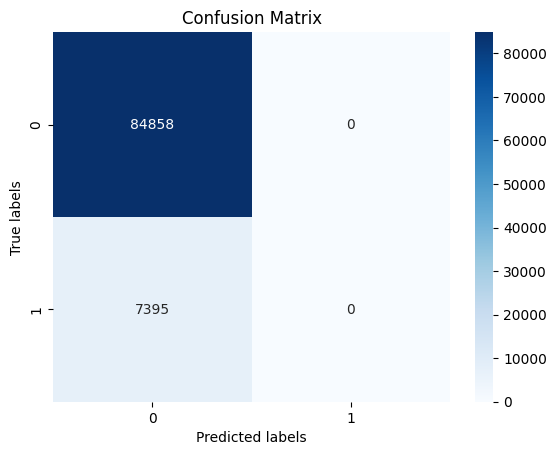

In [104]:
conf_matrix = confusion_matrix(ry_test, ry_pred)

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [106]:
precision = precision_score(ry_test, ry_pred)
recall = recall_score(ry_test, ry_pred)
f1 = f1_score(ry_test, ry_pred)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Precision: 0.00
Recall: 0.00
F1 Score: 0.00


c:\Users\gbrown\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


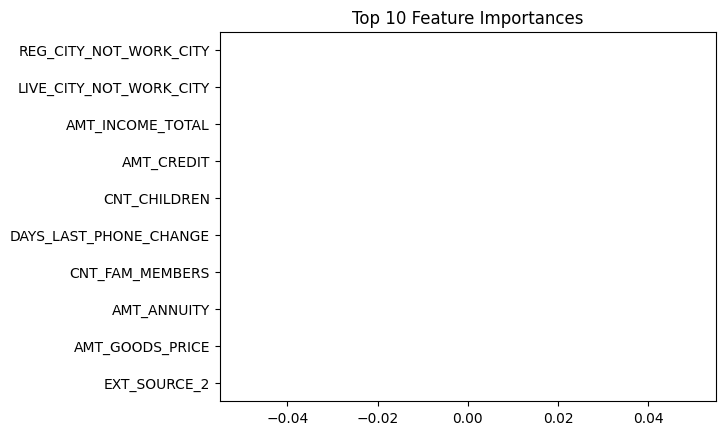

In [107]:
# Get feature importances
feature_importances = pd.Series(rf.feature_importances_, index=rX_encoded.columns)

# Plot feature importances
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.show()


### XGBoost

In [116]:
xgbX = selected_df.drop('TARGET', axis=1)
xgby = selected_df['TARGET']

xgbX_train, xgbX_test, xgby_train, xgby_test = train_test_split(xgbX, xgby, test_size=0.3, random_state=42)

In [119]:

# One-hot encode your datasets
X_train_encoded = pd.get_dummies(xgbX_train)
X_test_encoded = pd.get_dummies(xgbX_test)

# Ensure both training and testing sets have the same columns after encoding
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

# Now create DMatrix objects only from the encoded datasets
dtrain = xgb.DMatrix(X_train_encoded, label=xgby_train)
dtest = xgb.DMatrix(X_test_encoded, label=xgby_test)

# Define your model parameters and train your model as before
params = {
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss'
}
epochs = 10

# Train the model
model = xgb.train(params, dtrain, epochs)

# Predictions can be made with the model as needed


In [121]:
# Making predictions
xgbpredictions = model.predict(dtest)
# Convert probabilities to binary output with a 0.5 threshold
xgbpredictions = [1 if x > 0.5 else 0 for x in xgbpredictions]

# Evaluate predictions
xgbaccuracy = accuracy_score(xgby_test, xgbpredictions)
print(f'Accuracy: {xgbaccuracy:.2f}')


Accuracy: 0.92


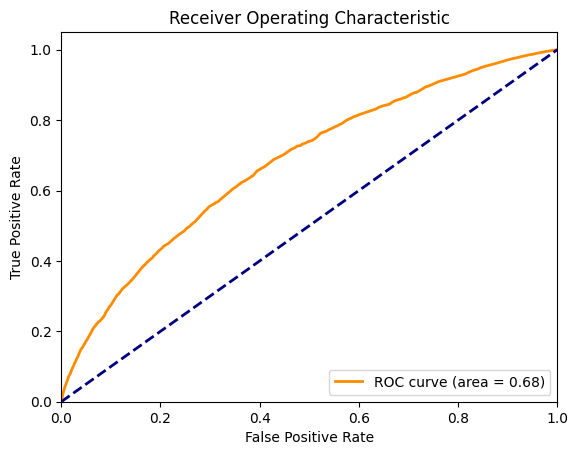

In [123]:
fpr, tpr, thresholds = roc_curve(xgby_test, model.predict(dtest))
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

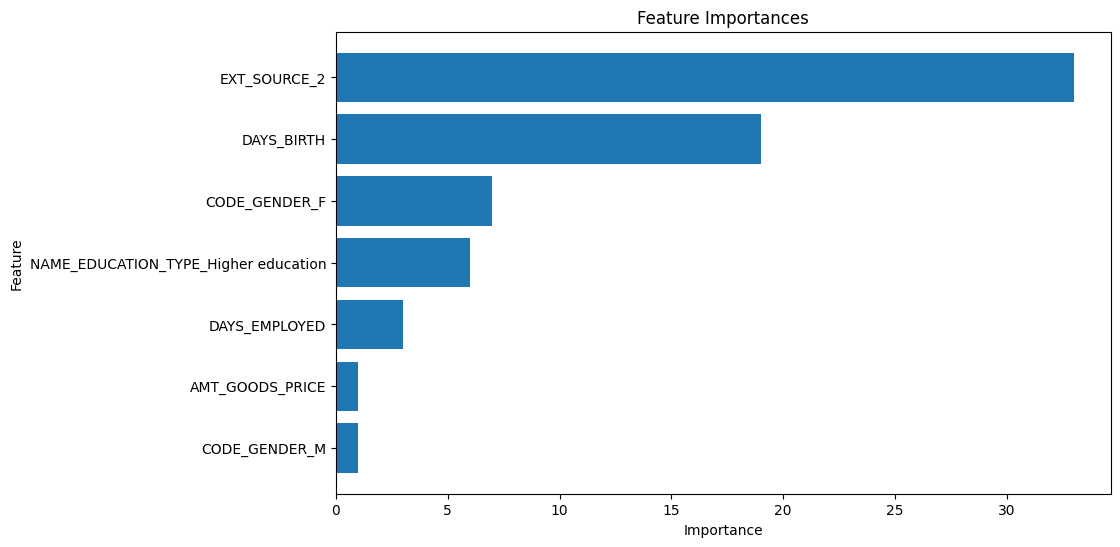

In [124]:
feature_importances = model.get_score(importance_type='weight')
sorted_importances = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)
keys, values = zip(*sorted_importances)

plt.figure(figsize=(10, 6))
plt.barh(range(len(keys)), values, tick_label=keys)
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()


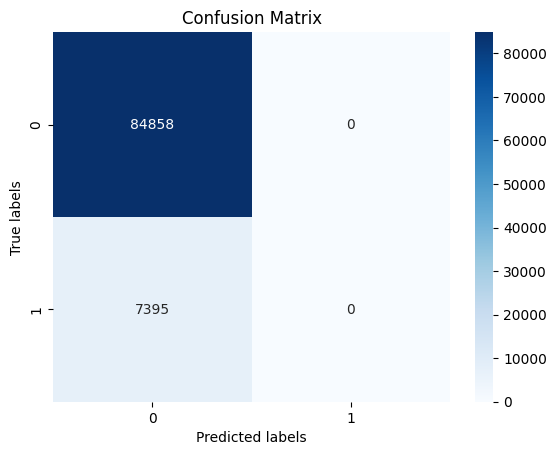

In [125]:
y_pred = [1 if x > 0.5 else 0 for x in model.predict(dtest)]

conf_mat = confusion_matrix(xgby_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()